<a href="https://colab.research.google.com/github/shreyagiri98/AdvancedMath_Assignment/blob/main/102303684_Shreya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Maths Assignment Solution

This notebook implements the solution for the Advanced Maths Assignment using Roll Number **102303684**.

## 1. Methodology

### Step 1: Transformation
We use the following transformation on the feature $x$ (NO2):

$$ z = x + a_r \sin(b_r x) $$

Where parameters $a_r$ and $b_r$ are derived from the University Roll Number ($r$) as follows:
$$ a_r = 0.05 \times (r \pmod 7) $$
$$ b_r = 0.3 \times ((r \pmod 5) + 1) $$

### Step 2: Probability Density Function Estimation
We model the transformed variable $z$ using the probability density function (PDF):

$$ \hat{p}(z) = c \cdot e^{-\lambda(z-\mu)^2} $$

This form is related to the standard Gaussian (Normal) distribution:
$$ f(z) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{z-\mu}{\sigma})^2} $$

By comparing terms, we identify:
- $\mu$ (Location parameter) is the mean mean $\mu$.
- $\lambda = \frac{1}{2\sigma^2}$ where $\sigma$ is the standard deviation.
- $c = \frac{1}{\sigma\sqrt{2\pi}}$ is the normalization constant.

We estimate $\mu$ and $\sigma$ using Maximum Likelihood Estimation (MLE) on the transformed data.

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as m
from scipy.stats import norm

r = 102303684
f = "data 2.csv"

a = 0.05 * (r % 7)
b = 0.3 * ((r % 5) + 1)

print(f"Roll Number: {r}")
print(f"a: {a}")
print(f"b: {b}")

Roll Number: 102303684
a: 0.0
b: 1.5


In [2]:
try:
    d = p.read_csv(f, encoding='latin1')
    if 'no2' in d.columns:
        d['no2'] = p.to_numeric(d['no2'], errors='coerce')
        x = d['no2'].dropna().values
        print(f"Data loaded. Valid samples: {len(x)}")

        z = x + a * n.sin(b * x)

        mu, std = norm.fit(z)

        l = 1 / (2 * std**2)
        c = 1 / (std * n.sqrt(2 * n.pi))

        print("-" * 20)
        print(f"Mean (mu): {mu}")
        print(f"Std Dev (sigma): {std}")
        print(f"Lambda: {l}")
        print(f"Constant (c): {c}")
        print("-" * 20)
    else:
        print("Column 'no2' not found.")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded. Valid samples: 182815
--------------------
Mean (mu): 21.144493359797966
Std Dev (sigma): 14.751687526206304
Lambda: 0.002297664400228084
Constant (c): 0.027043840217786178
--------------------


/tmp/ipython-input-992558686.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  d = p.read_csv(f, encoding='latin1')


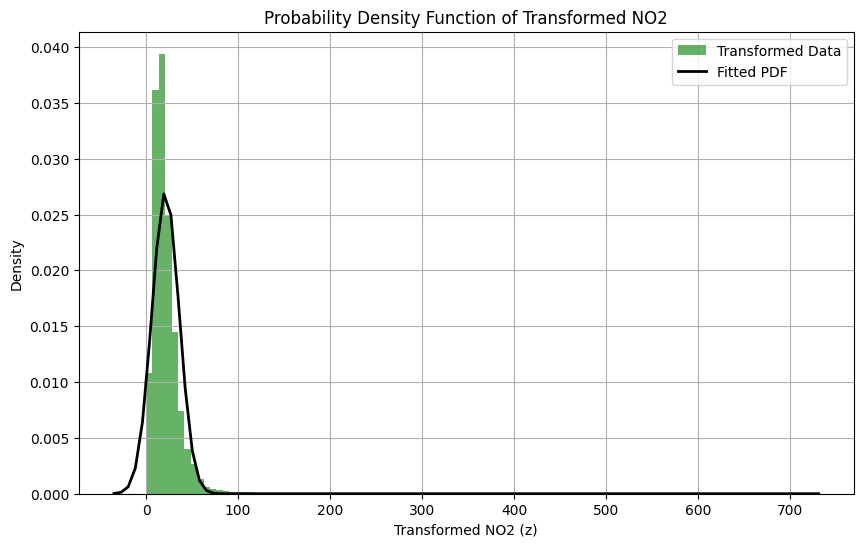

In [3]:
m.figure(figsize=(10, 6))
m.hist(z, bins=100, density=True, alpha=0.6, color='g', label='Transformed Data')

xmin, xmax = m.xlim()
lin_x = n.linspace(xmin, xmax, 100)
pdf = norm.pdf(lin_x, mu, std)
m.plot(lin_x, pdf, 'k', linewidth=2, label='Fitted PDF')

m.title("Probability Density Function of Transformed NO2")
m.xlabel("Transformed NO2 (z)")
m.ylabel("Density")
m.legend()
m.grid(True)
m.show()